In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set_theme()

In [17]:
results_df = pd.DataFrame(
    columns=["system_name", "run_id", "latency", "operation", "on_leader", "n_nodes", "n_clients", "order_on_write", "experiment"]
            )

for f in glob.glob("results/experiment_False_False*"):
    df = pd.read_csv(f)
    df["experiment"] = "read_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment_False_True*"):
    df = pd.read_csv(f)
    df["experiment"] = "write_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment_True_False*"):
    df = pd.read_csv(f)
    df["experiment"] = "read_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment_True_True*"):
    df = pd.read_csv(f)
    df["experiment"] = "write_heavy"
    results_df = results_df.append(df, ignore_index=True)

# df = pd.read_csv('results/final/perf_exp_1.csv')
# df.latency = df.latency * 10e-6
results_df.head()
df = results_df

In [18]:
agg_df = df.groupby(['experiment', 'operation', 'run_id', 'n_nodes', 'order_on_write']).latency.mean().reset_index()
agg_df["latency_factor"] = agg_df["latency"] / agg_df["n_nodes"]

In [19]:
print(agg_df.shape)
display(agg_df.head())

(8, 7)


,experiment,operation,run_id,n_nodes,order_on_write,latency,latency_factor
0,read_heavy,read,0,3,False,0.000712,0.000237
1,read_heavy,read,0,3,True,0.000711,0.000237
2,read_heavy,write,0,3,False,0.001800,0.000600
3,read_heavy,write,0,3,True,0.001794,0.000598
4,write_heavy,read,0,3,False,0.000723,0.000241


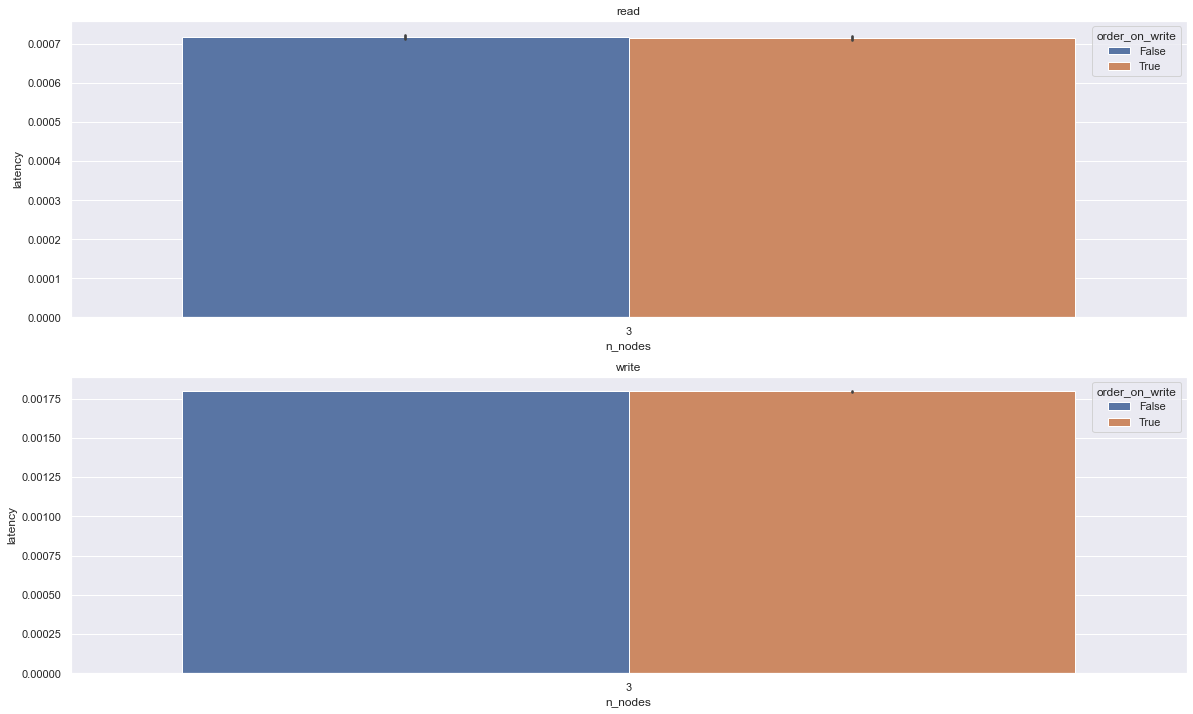

In [20]:
# ax = None
# for group, group_df in agg_df.groupby(['system_name', 'operation']):
#     label = f"order_on_write={group[0]}, operation={group[1]}"
#     ax = group_df.plot(x='n_nodes', y='speedup', figsize=(24, 6), ax=ax, label=label)

fig, axs = plt.subplots(2, 1, figsize=(20, 12))

idx = 0
for group, group_df in agg_df.groupby(['operation']):
    # display(group_df)
    axs[idx].set_title(group_df.iloc[0, 1])
    sns.barplot(ax=axs[idx], x='n_nodes', y='latency', hue="order_on_write", data=group_df)
    idx += 1


In [21]:
agg_df_leader = df.groupby(['experiment', 'operation', 'run_id', 'n_nodes', 'order_on_write', 'on_leader']).latency.mean().reset_index()
agg_df_leader["latency_factor"] = agg_df_leader["latency"] / agg_df_leader["n_nodes"]

IndexError: index 4 is out of bounds for axis 0 with size 4

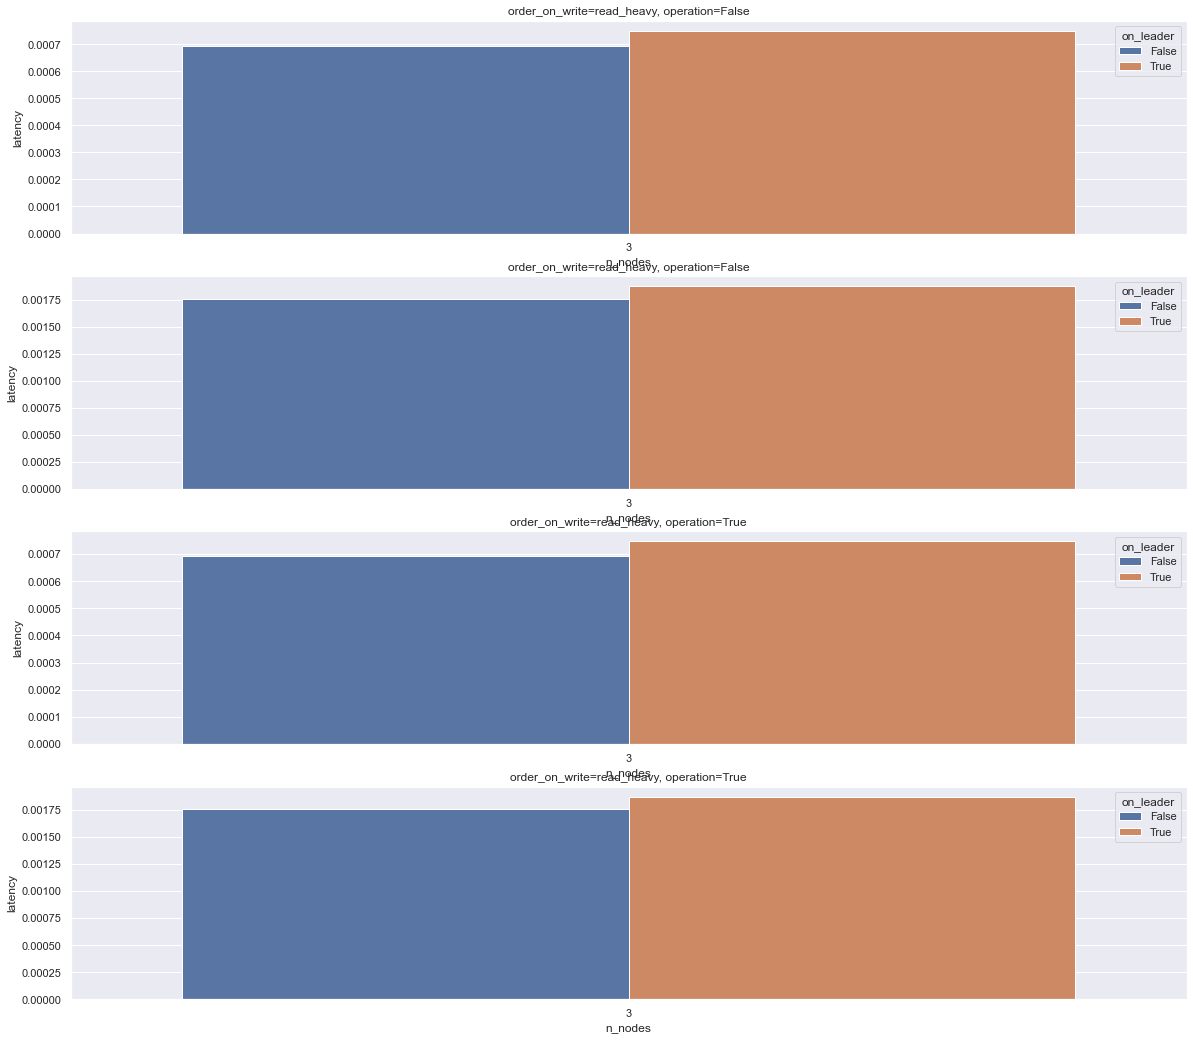

In [24]:
fig, axs = plt.subplots(4, 1, figsize=(20, 18))

idx = 0
for group, group_df in agg_df_leader.groupby(["experiment", "order_on_write", 'operation']):
    # display(group_df)
    # axs[idx].set_title(group_df.iloc[0, 1])
    axs[idx].set_title(f"order_on_write={group[0]}, operation={group[1]}")
    sns.barplot(ax=axs[idx], x='n_nodes', y='latency', hue="on_leader", data=group_df)
    idx += 1

In [23]:
# def speedup(sub_df):
#     two_nodes_df = sub_df[sub_df["n_nodes"] == 2]
#     sub_df["speedup"] = sub_df["latency"] / two_nodes_df["latency"].values
#     return sub_df
#
# agg_df_with_speedup = agg_df.groupby(['order_on_write', 'operation']).apply(speedup)

# fig = ax.get_figure()
# fig.savefig('results/figures/order_before_vs_after_write.pdf')